In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("../data/python_vacancies.csv")
df.head()

,title,company_name,job_description,location,salary,published
0,Senior Developer,saberliquidation.com,Python Senior Developer with the following exp...,Сполучені Штати,до $5500,10:54 10.01.2024
1,Software Engineer,INCOAlliance,We are looking for Engineer passionate about t...,Україна,до $5500,10:04 10.01.2024
2,Str.Middle/Senior Python Developer,Argument,Looking for an experienced Python engineer who...,"Україна, Польща, Німеччина, Сполучені Штати",до $5500,22:00 09.01.2024
3,Full-Stack Developer (Python (Django) + React.js),ScrumLaunch,Our project helps non-profits fundraise more e...,Україна,до $5500,21:48 09.01.2024
4,Performance engineer (Singapore),SimilarDev,About the company Cellebrite DI Ltd. is an Isr...,Сінгапур,до $5500,21:20 09.01.2024


In [28]:
def eda(df):
    shape_info = df.shape

    print("EXPLORATORY DATA ANALYSIS:\n")

    print(
        f"Numbers of rows: {shape_info[0]} \nNumbers of columns:  {shape_info[1]}\n",
        "\n------------------------------------------------------------------------------------\n",
    )

    print(
        f"All columns from the dataframe :\n\n {df.columns}\n",
        "\n------------------------------------------------------------------------------------\n",
    )

    print(f"Datatypes and Missing values:\n")
    print(
        df.info(),
        "\n------------------------------------------------------------------------------------\n",
    )

    print("MISSIN VALUES :\n")
    print(df.isnull().sum())


eda(df)

EXPLORATORY DATA ANALYSIS:

Numbers of rows: 199 
Numbers of columns:  6
 
------------------------------------------------------------------------------------

All columns from the dataframe :

 Index(['title', 'company_name', 'job_description', 'location', 'salary',
       'published'],
      dtype='object')
 
------------------------------------------------------------------------------------

Datatypes and Missing values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            199 non-null    object
 1   company_name     199 non-null    object
 2   job_description  199 non-null    object
 3   location         199 non-null    object
 4   salary           180 non-null    object
 5   published        199 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB
None 
-----------------------------------------------------------

Examine Job Description and getting technologies from it

In [29]:
technologies = [
    "Flask",
    "Django",
    "FastAPI",
    "RESTful APIs",
    "JavaScript",
    "React",
    "Angular",
    "Vue.js",
    "HTML/CSS",
    "SQLAlchemy",
    "PostgreSQL",
    "MySQL",
    "MongoDB",
    "Docker",
    "Kubernetes",
    "AWS (Amazon Web Services)",
    "Azure",
    "Git/GitHub",
    "Jenkins",
    "CircleCI",
    "Unit Testing",
    "Selenium",
    "Celery",
    "Redis",
    "GraphQL",
    "Pyramid",
    "Tornado",
    "WebSockets",
    "GraphQL",
    "REST",
    "Microservices",
    "OAuth",
    "JWT",
    "Bootstrap",
    "Tailwind CSS",
    "Scrapy",
    "Beautiful Soup",
    "Machine Learning",
    "NumPy",
    "Pandas",
    "Scikit-learn",
    "TensorFlow",
    "PyTorch",
    "Matplotlib",
    "Seaborn",
    "Plotly",
    "Jupyter Notebooks",
    "Pytest",
]

df["technologies"] = df["job_description"].apply(
    lambda desc: [tech for tech in technologies if tech in desc]
)
df.head(10)

,title,company_name,job_description,location,salary,published,technologies
0,Senior Developer,saberliquidation.com,Python Senior Developer with the following exp...,Сполучені Штати,до $5500,10:54 10.01.2024,"[Flask, MongoDB]"
1,Software Engineer,INCOAlliance,We are looking for Engineer passionate about t...,Україна,до $5500,10:04 10.01.2024,"[Docker, Jenkins, Redis, Pandas]"
2,Str.Middle/Senior Python Developer,Argument,Looking for an experienced Python engineer who...,"Україна, Польща, Німеччина, Сполучені Штати",до $5500,22:00 09.01.2024,"[PostgreSQL, Pyramid]"
3,Full-Stack Developer (Python (Django) + React.js),ScrumLaunch,Our project helps non-profits fundraise more e...,Україна,до $5500,21:48 09.01.2024,[]
4,Performance engineer (Singapore),SimilarDev,About the company Cellebrite DI Ltd. is an Isr...,Сінгапур,до $5500,21:20 09.01.2024,"[Azure, Selenium]"
5,Middle Python Developer,Starnavi,REQUIRED SKILLS: - 2+ years experience with Py...,Україна,до $5500,16:33 09.01.2024,"[Flask, Django, RESTful APIs, React, Angular, ..."
6,Junior Python Developer,Cosmonova Broadcast,Cosmonova Broadcast - це IT і High Tech для ме...,Україна (Київ),до $5500,15:22 09.01.2024,"[PostgreSQL, MySQL, REST]"
7,Automation QA Middle (Python) Engineer,Delphi Software,Perimeter 81 is expanding team for development...,"Україна (Вінниця, Київ)",до $5500,14:43 09.01.2024,"[MongoDB, Docker, Kubernetes, Azure]"
8,Senior Django Developer,Encomane,Клієнт: Консалтингова та аудиторська компанія ...,Україна,до $5500,14:14 09.01.2024,"[Django, PostgreSQL, MySQL, REST]"
9,QA Automation Engineer,PLVision,We invite a Quality Assurance (QA) Automation ...,"Україна (Київ, Львів, Одеса, Харків)",до $5500,13:16 09.01.2024,"[Jenkins, Pytest]"


Getting candidate level from title column

In [30]:
df["candidate_level"] = df["title"].apply(
    lambda title: "Junior"
    if "Junior" in title
    else "Middle"
    if "Middle" in title
    else "Senior"
    if "Senior" in title
    else "Unknown"
)

Transform data str to datetime64[ns]

In [31]:
df["published"] = pd.to_datetime(df["published"], format="%H:%M %d.%m.%Y")
df["published"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 199 entries, 0 to 198
Series name: published
Non-Null Count  Dtype         
--------------  -----         
199 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 KB


Data Visualization

Visualize Candidate level

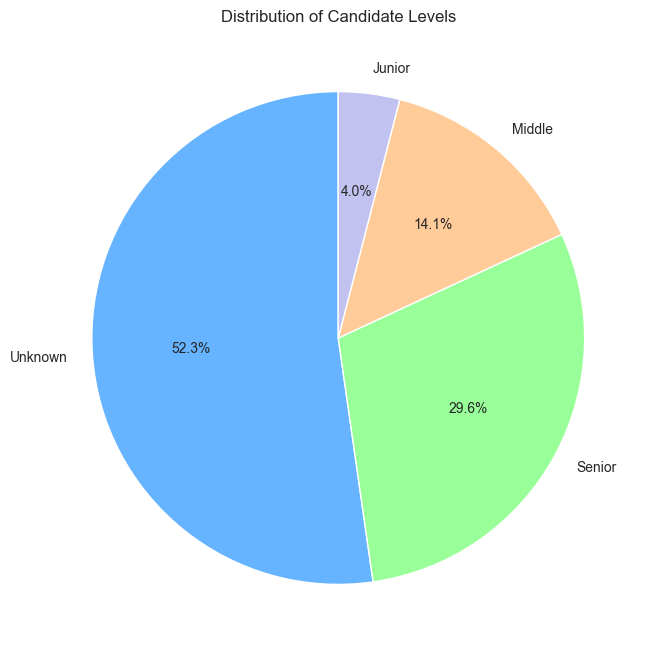

In [32]:
candidate_level_counts = df["candidate_level"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    candidate_level_counts,
    labels=candidate_level_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"],
)
plt.title("Distribution of Candidate Levels")
plt.show()

Total Vacancies posted by Day of The Week

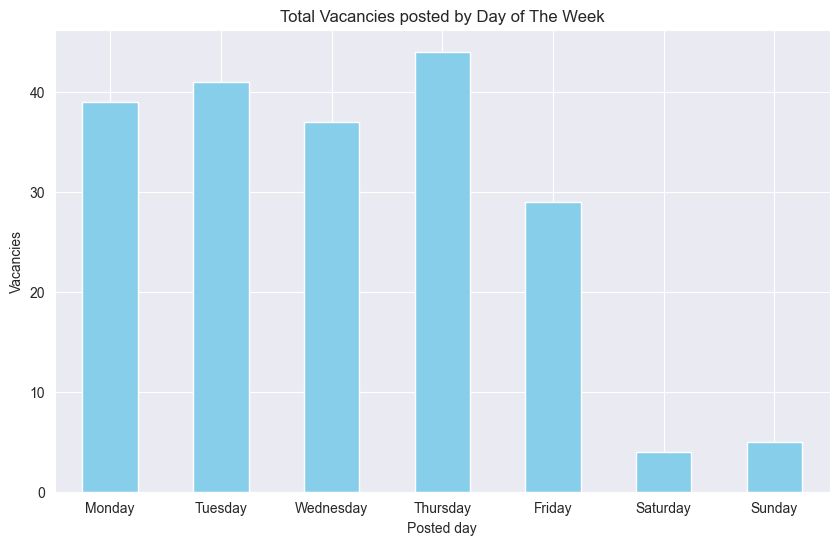

In [33]:
df["published"] = pd.to_datetime(df["published"])  # Convert to datetime if not already

df["published day"] = df["published"].dt.dayofweek

day_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}
df["Day Name"] = df["published day"].map(day_names)

weekly_posted_vacancies = df.groupby("Day Name").size()

desired_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(10, 6))
weekly_posted_vacancies.loc[desired_order].plot(kind="bar", color="skyblue")
plt.title("Total Vacancies posted by Day of The Week")
plt.xlabel("Posted day")
plt.ylabel("Vacancies")
plt.xticks(rotation=0)
plt.show()

Counting the number of job postings per month

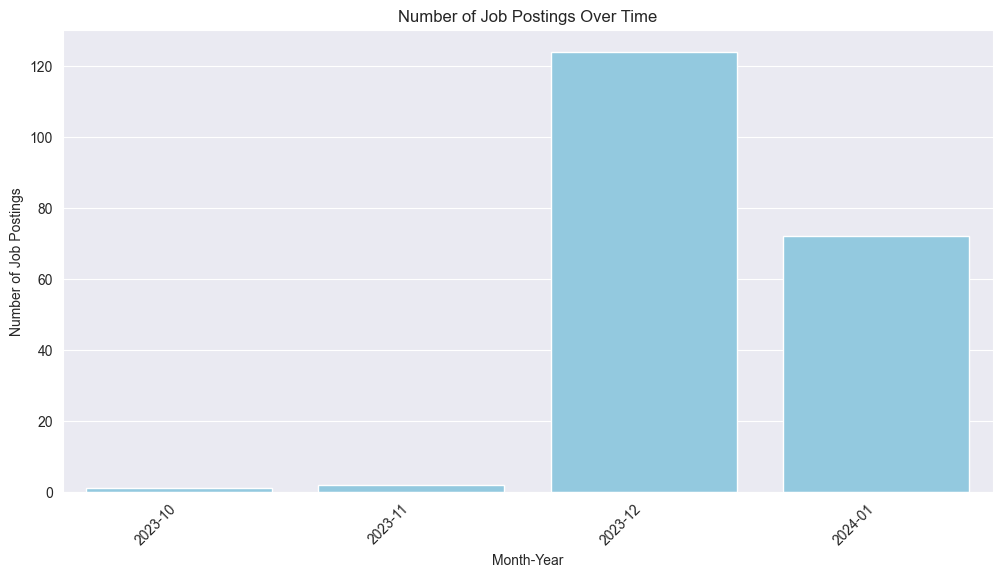

In [34]:
df["month_year"] = df["published"].dt.to_period("M")

job_postings_per_month = df["month_year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=job_postings_per_month.index.astype(str),
    y=job_postings_per_month.values,
    color="skyblue",
)
plt.title("Number of Job Postings Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45, ha="right")
plt.show()

Distribution of Salaries 

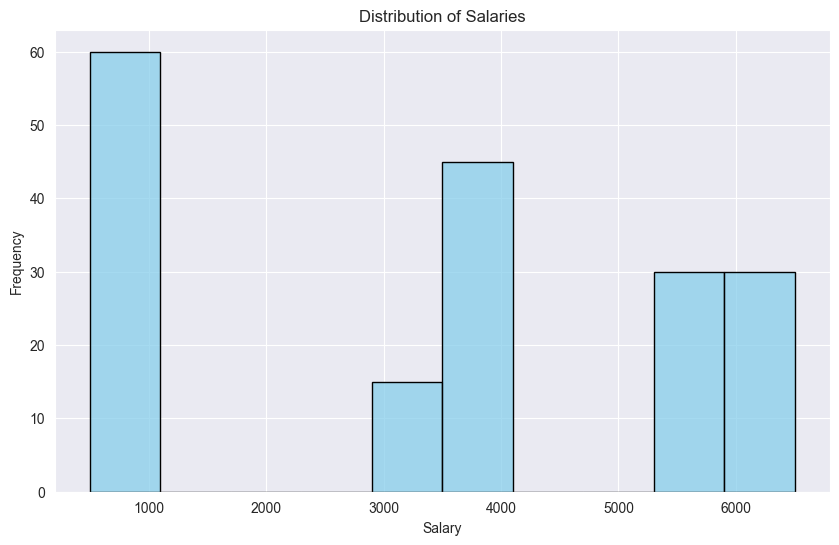

In [35]:
df["salary"] = df["salary"].str.extract(r"(\d+)").astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(df["salary"], bins=10, kde=False, color="skyblue", edgecolor="black")
plt.title("Distribution of Salaries")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

Technology Frequency

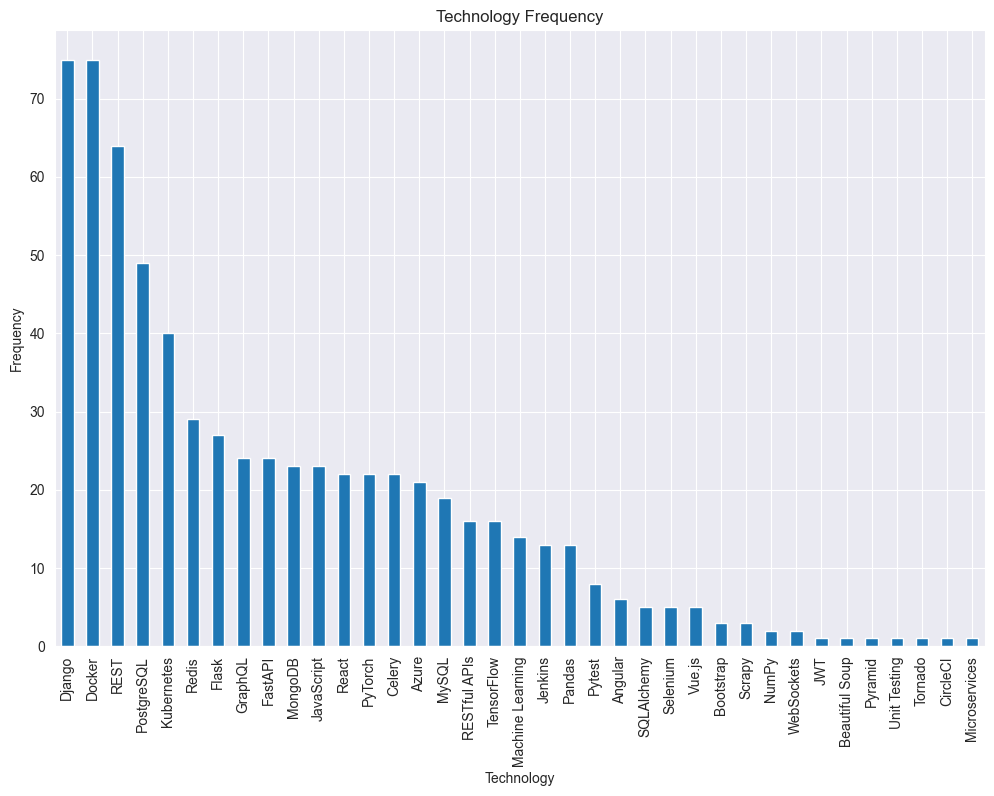

In [36]:
all_technologies = [tech for sublist in df["technologies"] for tech in sublist]

technology_counts = pd.Series(all_technologies).value_counts()

plt.figure(figsize=(12, 8))
technology_counts.plot(kind="bar")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.title("Technology Frequency")
plt.show()

Junior Technologies Frequency

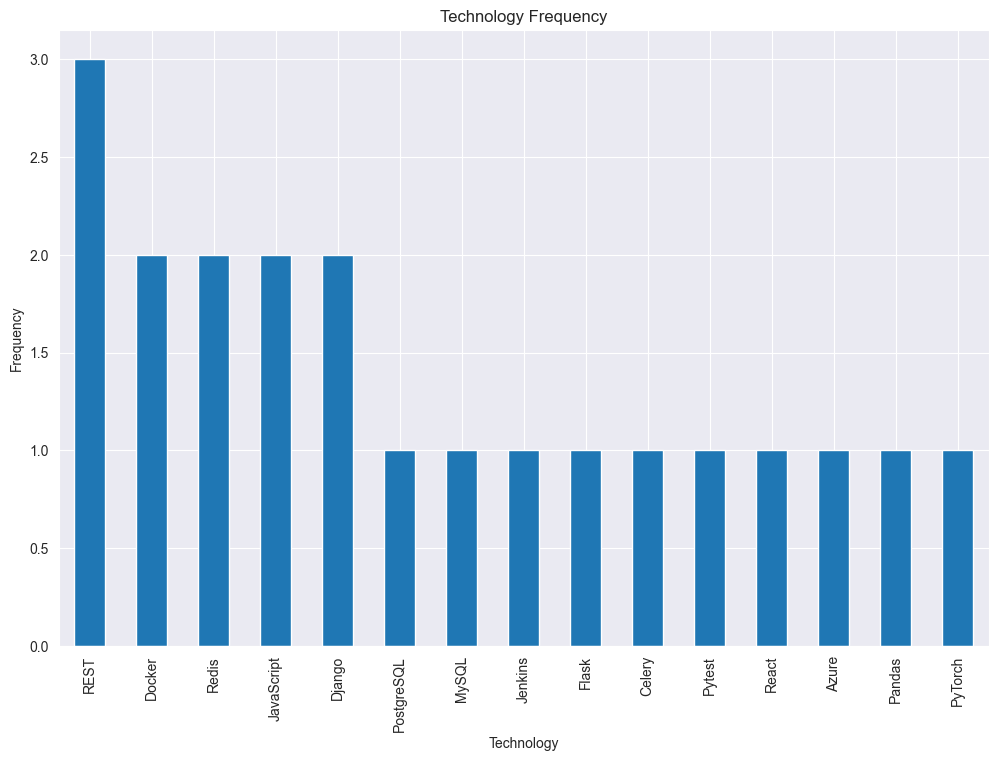

In [37]:
junior_technologies = [
    tech
    for sublist in df[df["candidate_level"] == "Junior"]["technologies"]
    for tech in sublist
]

technology_counts = pd.Series(junior_technologies).value_counts()

plt.figure(figsize=(12, 8))
technology_counts.plot(kind="bar")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.title("Technology Frequency")
plt.show()

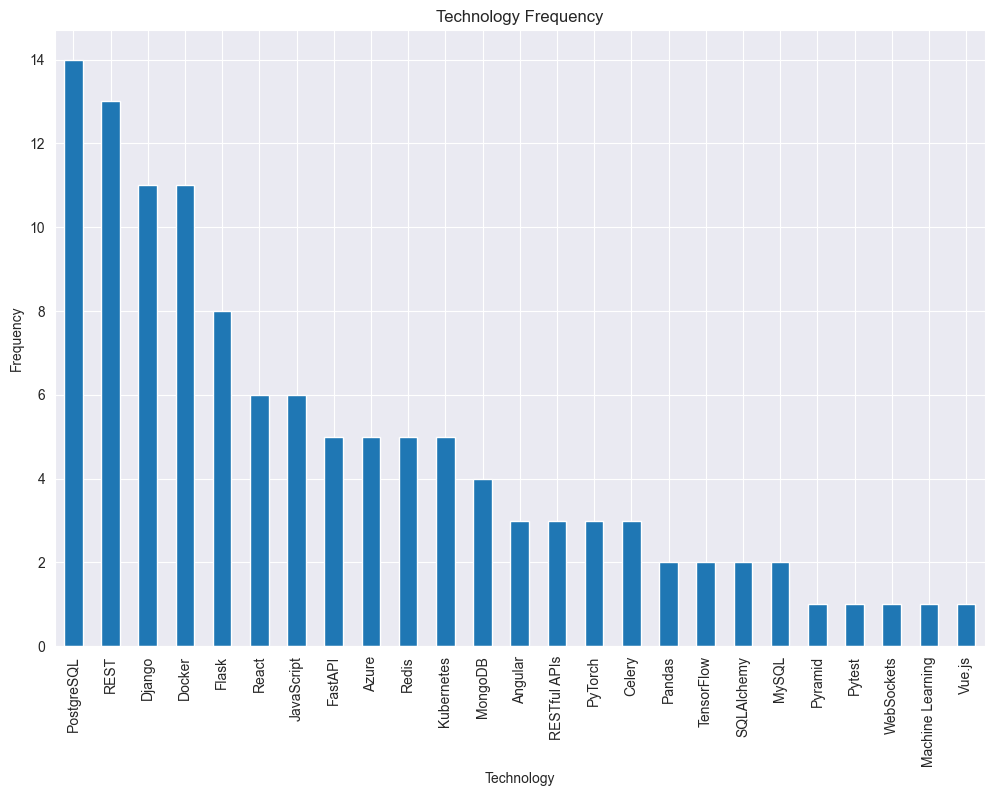

In [38]:
middle_technologies = [
    tech
    for sublist in df[df["candidate_level"] == "Middle"]["technologies"]
    for tech in sublist
]

technology_counts = pd.Series(middle_technologies).value_counts()

plt.figure(figsize=(12, 8))
technology_counts.plot(kind="bar")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.title("Technology Frequency")
plt.show()

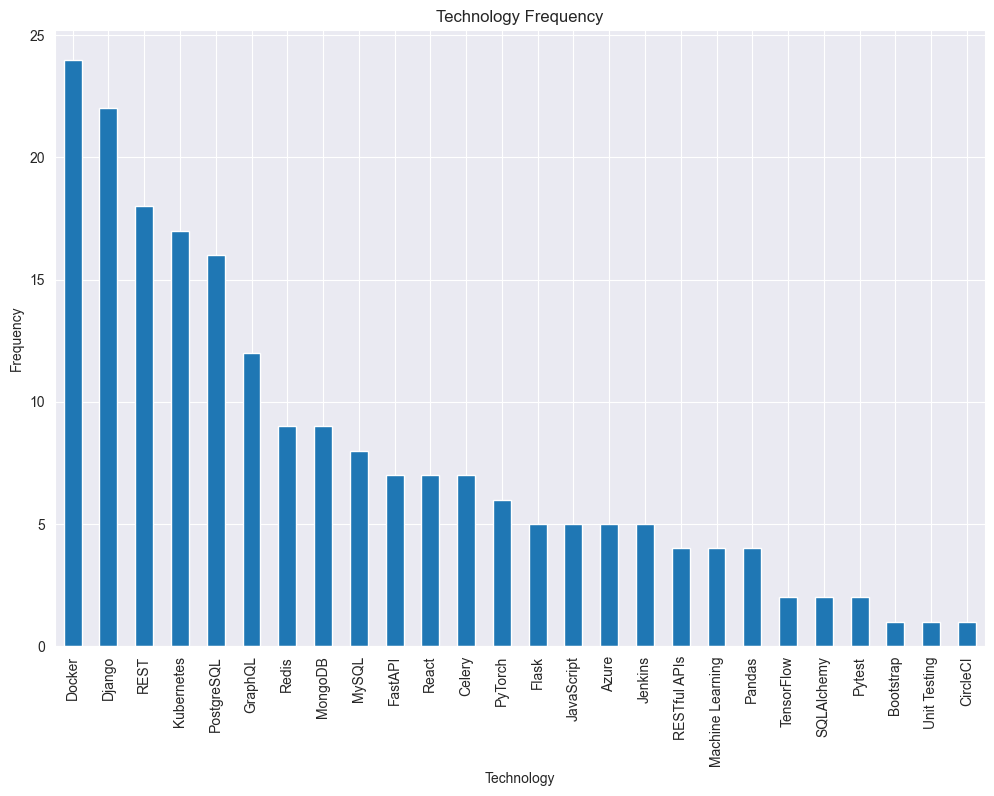

In [39]:
senior_technologies = [
    tech
    for sublist in df[df["candidate_level"] == "Senior"]["technologies"]
    for tech in sublist
]

technology_counts = pd.Series(senior_technologies).value_counts()

plt.figure(figsize=(12, 8))
technology_counts.plot(kind="bar")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.title("Technology Frequency")
plt.show()

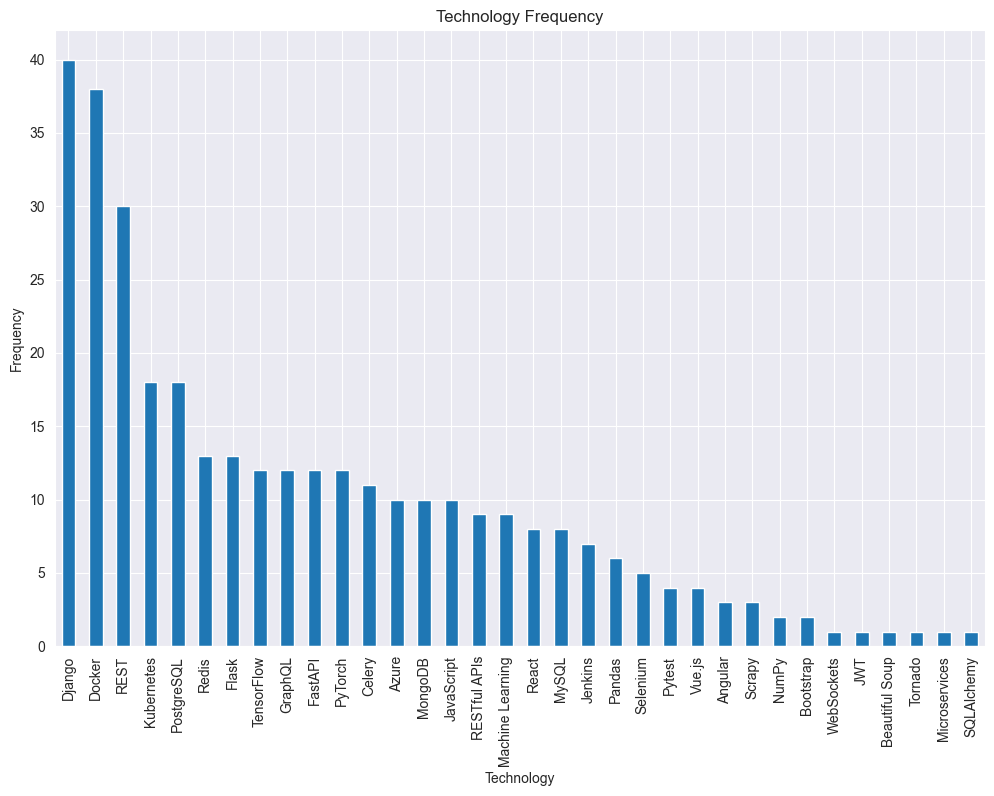

In [40]:
unknown_candidate_technologies = [
    tech
    for sublist in df[df["candidate_level"] == "Unknown"]["technologies"]
    for tech in sublist
]

technology_counts = pd.Series(unknown_candidate_technologies).value_counts()

plt.figure(figsize=(12, 8))
technology_counts.plot(kind="bar")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.title("Technology Frequency")
plt.show()

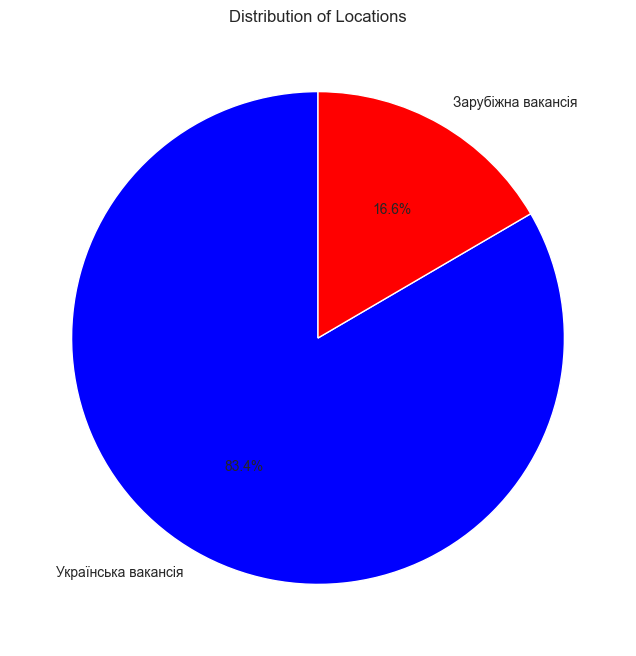

In [42]:
def categorize_location(location):
    countries = location.split(", ")
    if len(countries) > 1 and "Україна" not in countries:
        return "Зарубіжна вакансія"
    else:
        return "Українська вакансія"


df["category_vacancy"] = df["location"].apply(categorize_location)

category_counts = df["category_vacancy"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["blue", "red"],
)
plt.title("Distribution of Locations")
plt.show()